In [1]:
# !pip install flair
# !pip install pandas
# !pip install nltk
# !pip install wandb

!conda install -y pytorch==1.7.1 cpuonly -c pytorch

Solving environment: done

## Package Plan ##

  environment location: /home/mike/anaconda3

  added / updated specs:
    - cpuonly
    - pytorch==1.7.1


The following NEW packages will be INSTALLED:

  cpuonly            pytorch/noarch::cpuonly-1.0-0
  libuv              pkgs/main/linux-64::libuv-1.40.0-h7b6447c_0
  ninja              pkgs/main/linux-64::ninja-1.10.2-py38hff7bd54_0
  pytorch            pytorch/linux-64::pytorch-1.7.1-py3.8_cpu_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
import numpy as np 
import pandas as pd 
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import re
import string

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer 
import nltk
from nltk.tokenize import word_tokenize

import glob

import torch

1.7.1


In [4]:
from flair.embeddings import FlairEmbeddings, DocumentPoolEmbeddings, BertEmbeddings, XLNetEmbeddings

In [5]:
import wandb

In [6]:
from flair.data import Sentence

In [1]:
# initialise embedding classes
flair_embedding_forward = FlairEmbeddings("news-forward")
flair_embedding_backward = FlairEmbeddings("news-backward")
#bert_embedding = BertEmbeddings()
xlnet_embedding = TransformerWordEmbeddings("xlnet-large-cased")

NameError: name 'FlairEmbeddings' is not defined

In [8]:
# combine word embedding models
document_embeddings = DocumentPoolEmbeddings([xlnet_embedding, flair_embedding_backward, flair_embedding_forward])

In [9]:
dataFiles = '/mnt/c/Users/mwkoe/source/repos/PocketPy/pocket/texts9a/*.text.txt'

docs = []
for filename in glob.glob(dataFiles):
    file = open(filename, "r")
    docs.append(file.read())
    file.close()
 
print(len(docs))

3802


In [10]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
extra_stop_words = ['jan',
                    'january',
                    'feb',
                    'february',
                    'mar',
                    'march',
                    'apr',
                    'april',
                    'may',
                    'jun',
                    'june',
                    'jul',
                    'juli',
                    'july',
                    'aug',
                    'august',
                    'sep',
                    'sept',
                    'septemb',
                    'september',
                    'oct',
                    'octob',
                    'october',
                    'nov',
                    'novemb',
                    'november',
                    'dec',
                    'decemb',
                    'december',
                    'archivedecemb',
                    'sunday',
                    'monday',
                    'tuesday',
                    'wednesday',
                    'thursday',
                    'friday',
                    'saturday',
                    'fl',
                    'aumf',
                    'http',
                    'https',
                    'html',
                    'htm'
                    'href',
                    'uri',
                    'uris',
                    'url',
                    'urls',
                    'usecopyright',
                    'nbsp',
                    'www',
                    'blockquot',
                    'backgroundcolor',
                    'borderradius',
                    'catjefferi',
                    'contenthelpkeep',
                    'd_fp',
                    'div',
                    'ehttp',
                    'endtim',
                    'ffffff',
                    'emailsendcancel',
                    'emailrecipi',
                    'finalstateplot',
                    'menuhomeabout',
                    'okhttp',
                    'windowfig',
                    'zxing',
                    'onnavigatedto',
                    'onnext',
                    'pmthe',
                    'portalrec',
                    'progressbar',
                    'g_data',
                    'searchai',
                    'securitybi',
                    'settimeout',
                    'signin',
                    'sillydudevmo',
                    'sitesaaa',
                    'sln',
                    'togglebutton',
                    'redirect_to',
                    'reposget',
                    'expires_in',
                    'blogspot',
                    'flipboard',
                    'pinterest',
                    'linkedin',
                    'lifelock',
                    'mailchimp',
                    'mailto',
                    'blogger',
                    'reblog',
                    'nofollow',
                    'ning',
                    'ize',
                    'make_funct',
                    'indexsit',
                    'ise',
                    'ize',
                    'ble',
                    'aoø',
                    'readm',
                    'gitignor',
                    'makefil',
                    'code_of_conduct',
                    'changelog',
                    'inboxsubscrib',
                    'newsletterget',
                    'topicsshar',
                    '简体中文',
                    '繁體中文',
                    'turkc',
                    '한국어',
                    'polski',
                    'русскии',
                    'עברית',
                    '日本語',
                    'portugu',
                    'italiano',
                    'kiswahili',
                    'pусскии',
                    'francai',
                    'ceski',
                    'lietuviu',
                    'ελληνικα',
                    'latviesu',
                    'slovenscina',
                    'romana',
                    'slovencina',
                    'svenska',
                    'српски',
                    'espanol',
                    'ภาษาไทย',
                    'deutsch',
                    'украінська',
                    'brasil',
                    'ملايو',
                    'tieng',
                    'македонски',
                    'јазик',
                    'بهاس',
                    'norsk',
                    'filipino',
                    'العربية',
                    'nederland',
                    'malti',
                    'suomi',
                    'magyar',
                    'cestina',
                    'ελληνικη',
                    'български',
                    'беларуская',
                    'bahasa',
                    'viet',
                    'abcde',
                    'bookmark',
                    'github',
                    'your',
                    'few',
                    'my',
                    'me'
                    'myself',
                    'you',
                    'your',
                    'us',
                    'here',
                    'hope',
                    'feel',
                    'few',
                    'who',
                    'how',
                    'what',
                    'where',
                    'when'
                    'why',
                    'email',
                    'post',
                    'share',
                    'sharing',
                    'things'
                    'github',
                    'always',
                    'perhaps',
                    'blog'
                    ]
stop_words.extend(extra_stop_words)
stop_words = set(stop_words)
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /home/mike/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def preprocess_data(doc_set):
    texts = []
    for i in doc_set:
        
        #Lowercase
        input_str = i.lower()
    
        #Remove numbers
        input_str_1 = re.sub(r'\d+', ' ', input_str)
    
        #Remove Punctuation
        #input_str_2 = input_str_1.translate(str.maketrans('', '', string.punctuation))
        input_str_2 = re.sub('[^a-zA-Z0-9]{3,}', ' ', input_str_1)
        input_str_2 = re.sub('\[.*?\]', ' ', input_str_2)
        input_str_2 = re.sub('[%s]' % re.escape(string.punctuation), ' ', input_str_2)
        input_str_2 = re.sub('\w*\d\w*', '', input_str_2)
        input_str_2 = re.sub('[‘’“”…]', '', input_str_2)
        input_str_2 = re.sub('\n', ' ', input_str_2)
    
        #Remove stopwords
        word_tokens = word_tokenize(input_str_2) 
        input_str_3 = [word for word in word_tokens if word not in stop_words]
    
        #Lemmatize
        input_str_4 = [lemmatizer.lemmatize(word, pos ='v') for word in input_str_3]
        
        output = (' '.join(input_str_4))
        
        texts.append(output)
        #return(input_str_2)
        
    return(texts)

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mike/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/mike/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
clean_text=preprocess_data(docs)

In [15]:
clean_text[13]

'opendns part cisco take security everywhere opendns com enterprise security resources webcasts opendns part cisco take security everywhere cisco umbrella enterprise network security free trial contact login umbrella login cloudlock login products product cisco umbrella cloud security service cisco umbrella investigate product package support package functionality dns layer security secure web gateway cloud access security broker casb interactive intelligence solutions need protect mobile users fast incident response web content filter shadow discovery app block unify threat enforcement reduce security infections network protect guest wi fi sd wan security network endpoint security industry higher education security k school security healthcare retail hospitality security customers customer stories fast reliable cloud cloud security infrastructure cloud network status cloud network activity recursive dns service top reason trial get start unmatched intelligence cyber attack prevention 

In [16]:
print(type(clean_text[0]))
print(type(clean_text))
len(clean_text)
#print(type(Cleaned_Data[0]))
#print(type(Cleaned_Data))
#len(Cleaned_Data)

<class 'str'>
<class 'list'>


3802

In [17]:
col_names =  ['Article_clean'] 
  
df  = pd.DataFrame(clean_text, columns = col_names) 


In [18]:
df['Article_clean'][13]

'opendns part cisco take security everywhere opendns com enterprise security resources webcasts opendns part cisco take security everywhere cisco umbrella enterprise network security free trial contact login umbrella login cloudlock login products product cisco umbrella cloud security service cisco umbrella investigate product package support package functionality dns layer security secure web gateway cloud access security broker casb interactive intelligence solutions need protect mobile users fast incident response web content filter shadow discovery app block unify threat enforcement reduce security infections network protect guest wi fi sd wan security network endpoint security industry higher education security k school security healthcare retail hospitality security customers customer stories fast reliable cloud cloud security infrastructure cloud network status cloud network activity recursive dns service top reason trial get start unmatched intelligence cyber attack prevention 

In [19]:
df.head()

,Article_clean
0,collaborative edit prosemirror marijnhaverbeke...
1,simpler conditional logic powershell adamtheau...
2,big list naughty string com minimaxir big list...
3,calculator help decide roth traditional ira tw...
4,raft consensus algorithm raft io raft consensu...


In [24]:
# set up empty tensor
X = torch.empty(size=(len(df.index), 6144))  #.cuda()

In [25]:
type(document_embeddings)

flair.embeddings.document.DocumentPoolEmbeddings

In [26]:
%%time
# fill tensor with embeddings
i=0
for text in tqdm(df['Article_clean']):
    sentence = Sentence(text)
    document_embeddings.embed(sentence)
    embedding = sentence.get_embedding()
    X[i] = embedding
    i += 1

 12%|█▏        | 450/3802 [25:55:49<193:09:13, 207.44s/it]  


RuntimeError: [enforce fail at CPUAllocator.cpp:65] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 14726307904 bytes. Error code 12 (Cannot allocate memory)

In [25]:
X = X.cpu().detach().numpy()

In [26]:
#pca = PCA(n_components=300)

In [27]:
#X_red = pca.fit_transform(X)

In [28]:
#var= pca.explained_variance_ratio_

In [29]:
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#plt.plot(var1)

In [30]:
#pca = PCA(n_components=300)
#X_red = pca.fit_transform(X)

In [31]:
X_red = X

Text(0, 0.5, 'Inertia')

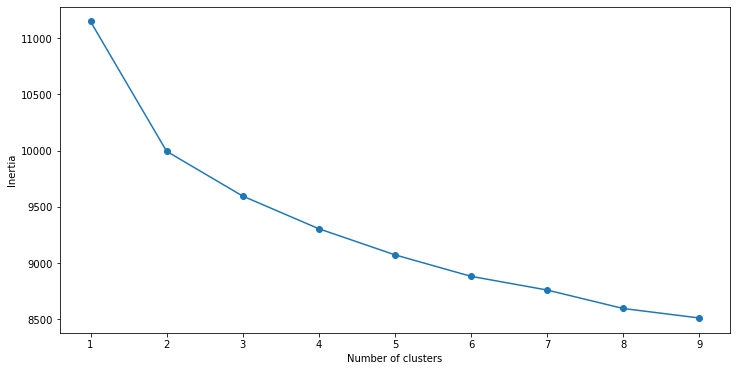

In [32]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_red)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [33]:
N_CLUSTERS = 6

kmeans = KMeans(n_jobs = -1, n_clusters = N_CLUSTERS, init='k-means++')
kmeans.fit(X_red)
pred = kmeans.fit_predict(X_red)

In [34]:
df['new_topic_km'] = pred

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
print(df['new_topic_km'].value_counts())

3    113
2     89
4     76
1     44
5     39
0     39
Name: new_topic_km, dtype: int64


In [36]:
def get_top_words(documents, top_n):
  '''
  function to get top tf-idf words and phrases
  '''
  vectoriser = TfidfVectorizer(ngram_range=(1, 2),
                               max_df=0.5)
  tfidf_matrix = vectoriser.fit_transform(documents)
  feature_names = vectoriser.get_feature_names()
  df_tfidf = pd.DataFrame()
  for doc in range(len(documents)):
    words = []
    scores = []
    feature_index = tfidf_matrix[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
      words.append(w)
      scores.append(s)
    df_temp = pd.DataFrame(data={'word':words, 'score':scores})
    df_temp = df_temp.sort_values('score',ascending=False).head(top_n)
    df_temp['topic'] = doc
    df_tfidf = df_tfidf.append(df_temp)
  return df_tfidf

In [37]:
topic_docs = []
# group text into topic-documents
for topic in range(N_CLUSTERS):
    topic_docs.append(' '.join(df[df['new_topic_km']==topic]['Article_clean'].values))

In [38]:
# apply function
df_tfidf = get_top_words(topic_docs, 10)

In [39]:
df_tfidf.loc[df_tfidf['topic'] == 0]

,word,score,topic
16646,medicaid,0.286915,0
16521,insurers,0.161890,0
16641,obamacare,0.126540,0
15780,medicare,0.111340,0
16636,budget,0.108463,0
3795,task force,0.094211,0
16513,kaiser,0.089929,0
13484,medicaid expansion,0.088778,0
16457,lawmakers,0.086770,0
16454,senate,0.083155,0


In [40]:
df_tfidf.loc[df_tfidf['topic'] == 1]

,word,score,topic
16761,species,0.131367,1
16194,cheese,0.126988,1
16593,crop,0.126988,1
15336,camel,0.122821,1
15185,milpa,0.117481,1
16946,forest,0.096121,1
17316,chocolate,0.088727,1
15859,cacao,0.085441,1
15741,malaria,0.085441,1
15843,meat,0.083199,1


In [41]:
df_tfidf.loc[df_tfidf['topic'] == 2]

,word,score,topic
31102,song,0.172154,2
32305,film,0.150536,2
30562,songs,0.146209,2
27400,patriots,0.138711,2
27363,falcon,0.101221,2
28906,bhatt,0.086226,2
32442,moore,0.083054,2
30989,baldwin,0.074979,2
30047,hockey,0.074979,2
30460,album,0.073780,2


In [42]:
df_tfidf.loc[df_tfidf['topic'] == 3]

,word,score,topic
37605,senate,0.228277,3
37585,democrats,0.226421,3
35008,refugees,0.152185,3
33476,iran,0.129696,3
37203,trump say,0.113210,3
35378,nominees,0.112110,3
35937,gorsuch,0.090940,3
32914,missile,0.090128,3
29809,state department,0.090128,3
33465,refugee,0.081335,3


In [43]:
df_tfidf.loc[df_tfidf['topic'] == 4]


,word,score,topic
30966,refugees,0.262239,4
29931,isis,0.193451,4
31381,syria,0.142621,4
26048,attacker,0.136230,4
30874,syrian,0.135720,4
29907,refugee,0.122610,4
2268,target one,0.099681,4
29914,iran,0.092638,4
29857,muslims,0.089914,4
27440,rutland,0.086390,4


In [44]:
df_tfidf.loc[df_tfidf['topic'] == 5]

,word,score,topic
15093,quantum,0.136841,5
15534,intersex,0.098525,5
14974,lawler,0.087578,5
15646,cordano,0.087578,5
15648,gallaudet,0.082105,5
15417,testosterone,0.076631,5
17350,virtual,0.075789,5
17505,girls,0.075789,5
16615,deaf,0.072000,5
18607,recess,0.072000,5
